# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**The answers for question 1 can be found in the pdf I uploaded to my Github repo.**

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

In [2]:
#question 1 part 1
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/ds4e/EDA/refs/heads/main/assignment/data/ForeignGifts_edu.csv"
df1 = pd.read_csv(url,low_memory=False)
print(df1)

          ID    OPEID                     Institution Name          City  \
0          1   102000        Jacksonville State University  Jacksonville   
1          2   104700                      Troy University          Troy   
2          3   105100                University of Alabama    Tuscaloosa   
3          4   105100                University of Alabama    Tuscaloosa   
4          5   105100                University of Alabama    Tuscaloosa   
...      ...      ...                                  ...           ...   
28216  28217  4279700  Albert Einstein College of Medicine         Bronx   
28217  28218  4279700  Albert Einstein College of Medicine         Bronx   
28218  28219  4279700  Albert Einstein College of Medicine         Bronx   
28219  28220  4279700  Albert Einstein College of Medicine         Bronx   
28220  28221  4279700  Albert Einstein College of Medicine         Bronx   

      State  Foreign Gift Received Date  Foreign Gift Amount      Gift Type  \
0       

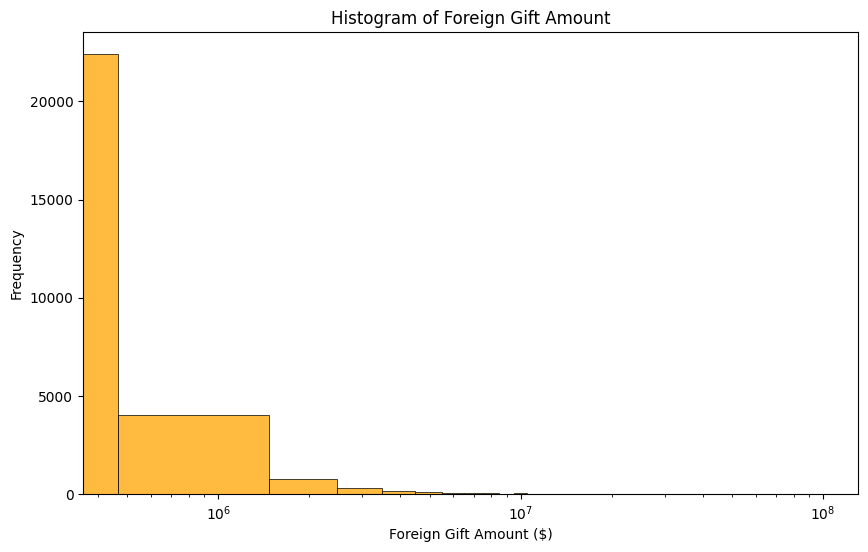

In [13]:
#question 1 part 2
plt.figure(figsize=(10, 6))
sns.histplot(df1['Foreign Gift Amount'], bins=100, color='orange')
plt.xlabel('Foreign Gift Amount ($)')
plt.ylabel('Frequency')
plt.xscale('log')  # Apply log scale for better visualization
plt.title('Histogram of Foreign Gift Amount')

# Show the plot
plt.show()

The histogram of foreign gift amounts reveals a highly right-skewed distribution, indicating that while most institutions receive small financial gifts, a few receive exceptionally large contributions. The majority of donations are concentrated in the lower range, with a sharp decline as the gift amount increases. This suggests that foreign financial support is unevenly distributed, with only a handful of institutions benefiting from multi-million dollar contributions.

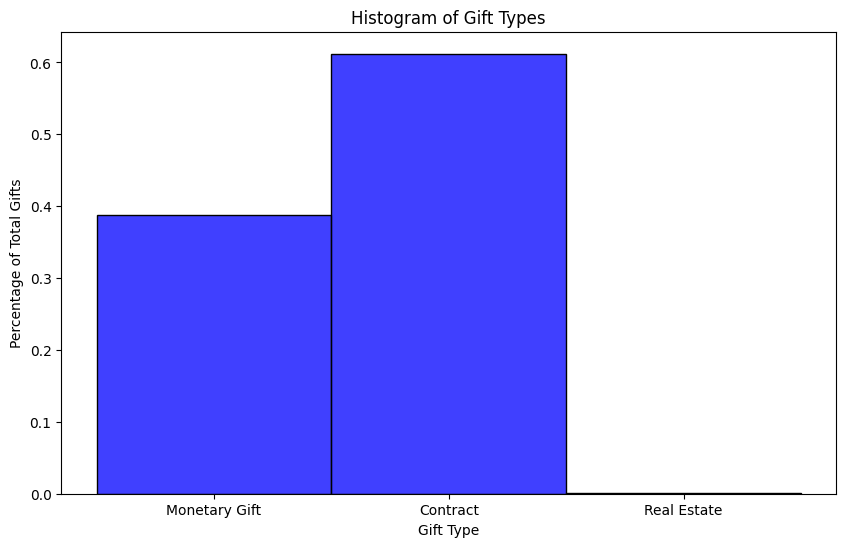

In [17]:
# Question 2 part 3
# Create a histogram for 'Gift Type' with proportions
plt.figure(figsize=(10, 6))
sns.histplot(df1['Gift Type'], discrete=True, stat="proportion", color='blue')

# Labeling the plot
plt.xlabel('Gift Type')
plt.ylabel('Percentage of Total Gifts')
plt.title('Histogram of Gift Types')

# Show the plot
plt.show()

The histogram of Gift Type reveals that the majority of foreign gifts fall into two primary categories: Contracts and Monetary Gifts. Contracts make up the largest share, accounting for approximately 60% of all recorded foreign gifts, while Monetary Gifts follow closely behind at nearly 40%. In contrast, Real Estate gifts are extremely rare, suggesting that foreign entities are significantly less likely to donate physical property to institutions.

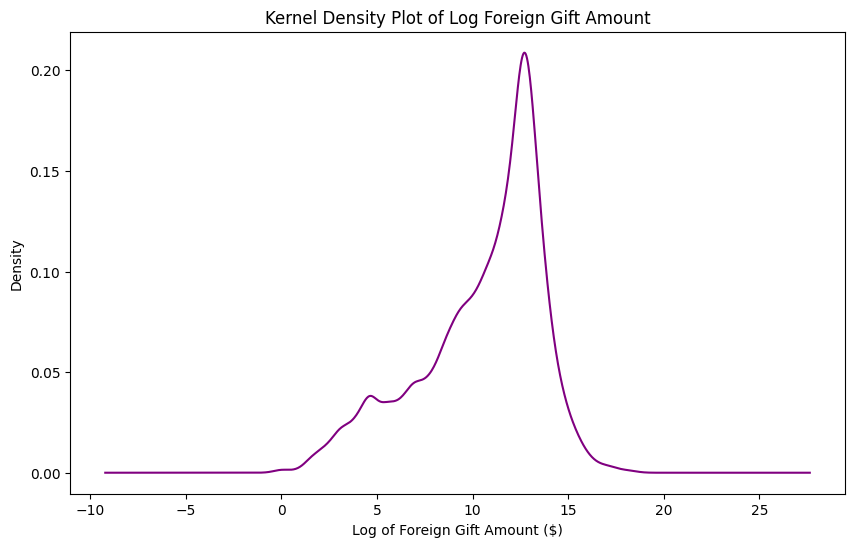

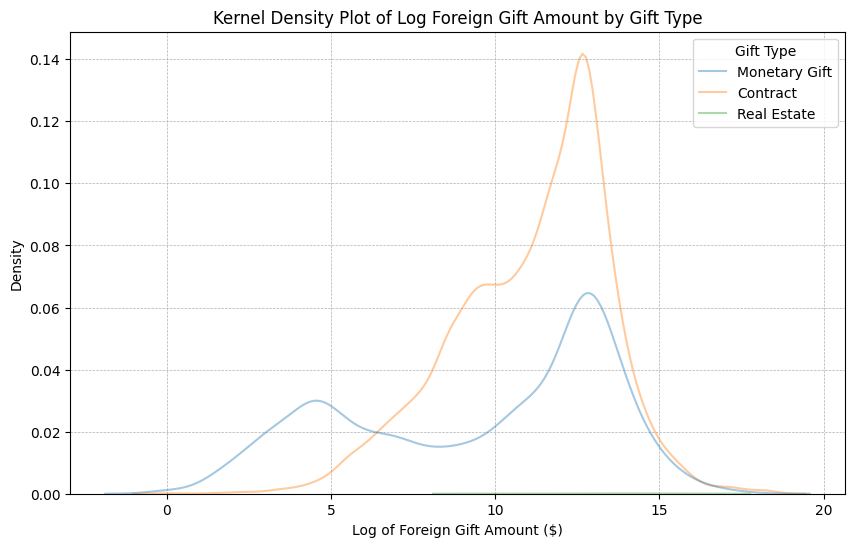

In [31]:
# Question 2 part 4
# Drop missing and non-positive values before log transformation
df_clean = df1.dropna(subset=['Foreign Gift Amount'])
df_clean = df_clean[df_clean['Foreign Gift Amount'] > 0]  # Keep only positive values

# Apply log transformation
df_clean['Log Foreign Gift Amount'] = np.log(df_clean['Foreign Gift Amount'])

#df_clean["Gift Type"].unique()

# Create Kernel Density Plot of log-transformed 'Foreign Gift Amount'
plt.figure(figsize=(10, 6))
df_clean['Log Foreign Gift Amount'].plot.density(color='purple')
plt.xlabel('Log of Foreign Gift Amount ($)')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Log Foreign Gift Amount')


# Show the first plot
plt.show()



plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_clean, x="Log Foreign Gift Amount", hue="Gift Type", alpha=0.4)
plt.xlabel('Log of Foreign Gift Amount ($)')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Log Foreign Gift Amount by Gift Type')
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()




I noticed that the overall distribution of log-transformed foreign gift amounts is right-skewed, indicating that while most foreign donations are relatively small, a few high-value contributions significantly impact the dataset. The presence of a primary peak around log(10-15) suggests that a large portion of foreign gifts falls within a specific range of high-value donations.

When broken down by gift type, clear differences emerge. Contracts (orange curve) consistently involve higher-value contributions, peaking around log(10-15), indicating that contractual agreements often lead to larger sums of foreign funding. In contrast, monetary gifts (blue curve) exhibit a wider spread, with peaks at log(5) and log(13), suggesting that they vary significantly in size, ranging from small donations to substantial financial contributions. Real estate gifts (green curve) are rare, contributing minimally to the overall dataset.



In [32]:
# Question 2 part 5

# Drop missing values in 'Country of Giftor' and 'Foreign Gift Amount'
df_clean = df1.dropna(subset=['Country of Giftor', 'Foreign Gift Amount'])

# Top 15 countries by the number of gifts
top_countries_by_count = df_clean["Country of Giftor"].value_counts().head(15)

# Top 15 countries by the total amount given
top_countries_by_amount = df_clean.groupby("Country of Giftor")["Foreign Gift Amount"].sum().nlargest(15)

# Display results
print("Top 15 Countries by Number of Gifts:")
print(top_countries_by_count)

print("\nTop 15 Countries by Total Gift Amount:")
print(top_countries_by_amount)


Top 15 Countries by Number of Gifts:
Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64

Top 15 Countries by Total Gift Amount:
Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA  

Top 15 Institutions by Total Foreign Gift Amount:
Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype:

<ipython-input-39-f3187ff3cde5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_institutions_by_amount.index, y=top_institutions_by_amount.values, palette="Blues_r")


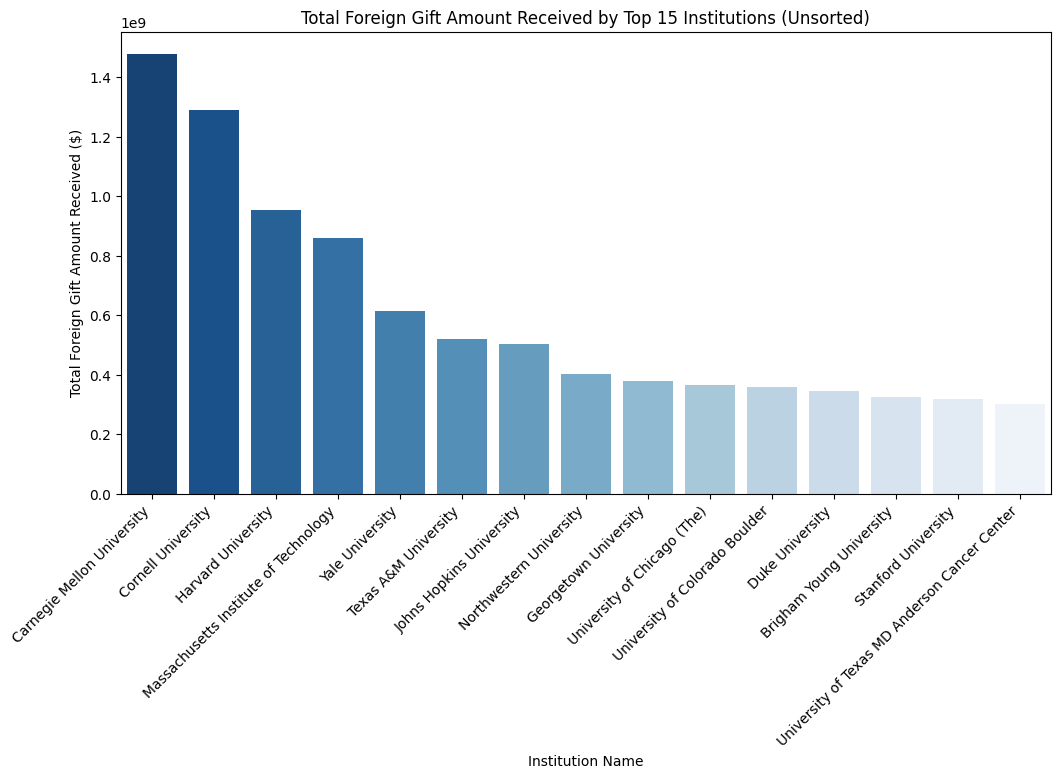

In [39]:
# Question 2 part 6
# Compute the top 15 institutions by total foreign gift amount received
top_institutions_by_amount = df_clean.groupby("Institution Name")["Foreign Gift Amount"].sum().nlargest(15)

# Display results
print("Top 15 Institutions by Total Foreign Gift Amount:")
print(top_institutions_by_amount)

# Create a bar plot without sorting the total received amount
plt.figure(figsize=(12, 6))
sns.barplot(x=top_institutions_by_amount.index, y=top_institutions_by_amount.values, palette="Blues_r")

# Labeling the plot
plt.xlabel('Institution Name')
plt.ylabel('Total Foreign Gift Amount Received ($)')
plt.title('Total Foreign Gift Amount Received by Top 15 Institutions (Unsorted)')
plt.xticks(rotation=45, ha='right')


# Show the plot
plt.show()

In [46]:
# Question 2 part 7
#df_clean["Giftor Name"].unique()
# Drop all NaN values first
df_clean = df1.dropna()
#df_clean["Giftor Name"].unique()
# Convert 'Foreign Gift Amount' to numeric, coercing errors
df_clean['Foreign Gift Amount'] = pd.to_numeric(df_clean['Foreign Gift Amount'], errors='coerce')

# Compute the top 15 giftors by total foreign gift amount given
top_giftors_by_amount = df_clean.groupby("Giftor Name")["Foreign Gift Amount"].sum().nlargest(1)
print(top_giftors_by_amount)

#Giftor that provides the most money is Qatar Foundation.


Giftor Name
Qatar Foundation    1166503744
Name: Foreign Gift Amount, dtype: int64


<ipython-input-46-2521c8c2051b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Foreign Gift Amount'] = pd.to_numeric(df_clean['Foreign Gift Amount'], errors='coerce')


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.